# Ejercicio 7

## Dataset

In [466]:
import pandas as pd
abalones = pd.read_csv("../data/abalones.csv")

print(abalones)

     Gender  Length  Diameter  Height  Full Size  Meat Weight  Viscera Weight  \
0         M   0.455     0.365   0.095     0.5140       0.2245          0.1010   
1         M   0.350     0.265   0.090     0.2255       0.0995          0.0485   
2         F   0.530     0.420   0.135     0.6770       0.2565          0.1415   
3         M   0.440     0.365   0.125     0.5160       0.2155          0.1140   
4         I   0.330     0.255   0.080     0.2050       0.0895          0.0395   
...     ...     ...       ...     ...        ...          ...             ...   
4172      F   0.565     0.450   0.165     0.8870       0.3700          0.2390   
4173      M   0.590     0.440   0.135     0.9660       0.4390          0.2145   
4174      M   0.600     0.475   0.205     1.1760       0.5255          0.2875   
4175      F   0.625     0.485   0.150     1.0945       0.5310          0.2610   
4176      M   0.710     0.555   0.195     1.9485       0.9455          0.3765   

      Shell Weight  Rings  

El data frame consiste de 9 _features_ y 4177 muestras. 

## Análisis de las variables exploratorias

### Normalidad

En principio, se analizan las variables exploratorias a partir de un Boxplot dado que LDA asume la distribución de ellas como una distribución gaussiana. 

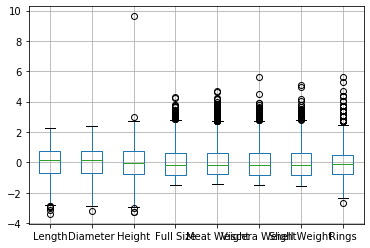

In [467]:
from sklearn.preprocessing import scale

# Removing female samples
df = abalones[abalones["Gender"] != "F"]

def standarize(df, columns):
    df_scaled = scale(df)
    return pd.DataFrame(scaled, columns = column)

column = ["Length", "Diameter", "Height", "Full Size", "Meat Weight", "Viscera Weight", "Shell Weight", "Rings"]
df_sd = standarize(df.drop("Gender", axis = 1), column)
df_sd.boxplot(column = column)

Es posible ver que para algunas de ellas existen muchos puntos atípicos o vulgarmente conocidos como _outliers_.
Vale aclarar que las variables han sido estandarizadas para verlas en un mismo gráfico y dado a que sólo es de interés analizar rápidamente la normalidad de éstas.

### Multicolinealidad

Para elegir las mejores variables para la clasificación y que el estimador LDA performe de las mejor manera es necesario analizar _multicolinealidad_ de las variables exploratorias. 

Dicho esto, se seleccionarán variables cuya relación entre ellas no sea lineal mirando un _scatter plot_.

In [468]:
import matplotlib.pyplot as plt

**Longitud**

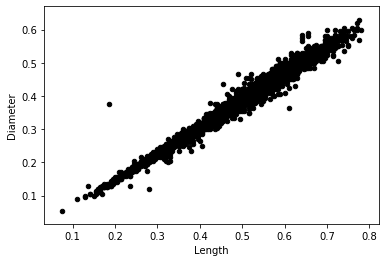

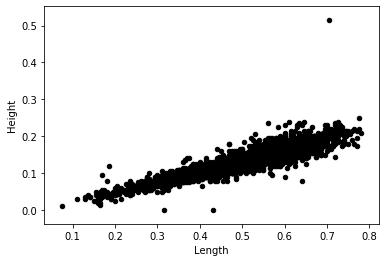

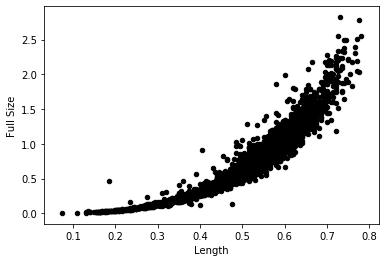

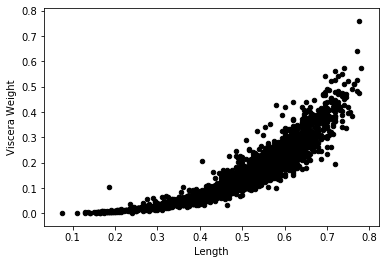

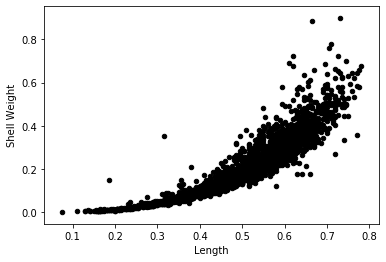

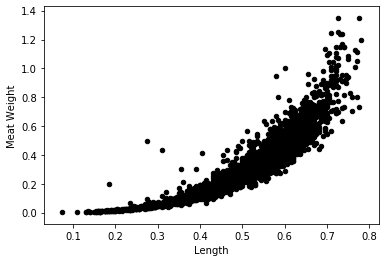

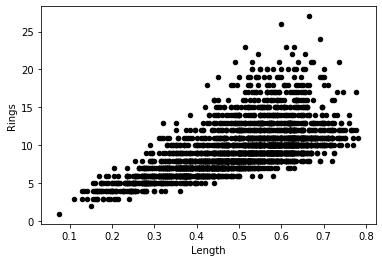

In [469]:
df.plot(kind='scatter', x='Length', y='Diameter', color='k')
df.plot(kind='scatter', x='Length', y='Height', color='k')
df.plot(kind='scatter', x='Length', y='Full Size', color='k')
df.plot(kind='scatter', x='Length', y='Viscera Weight', color='k')
df.plot(kind='scatter', x='Length', y='Shell Weight', color='k')
df.plot(kind='scatter', x='Length', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Length', y='Rings', color='k')

**Diámetro**

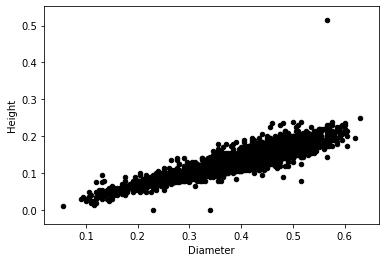

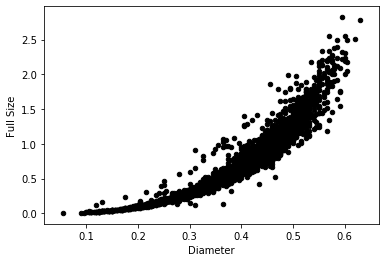

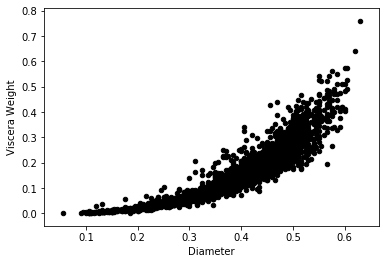

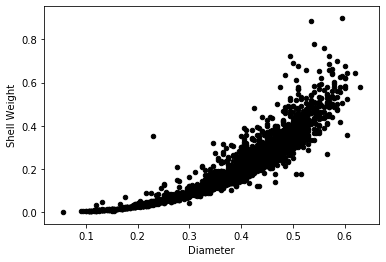

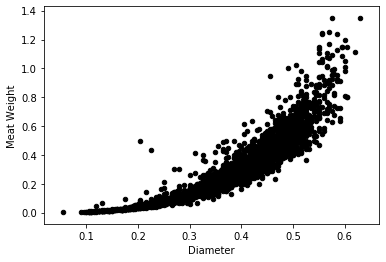

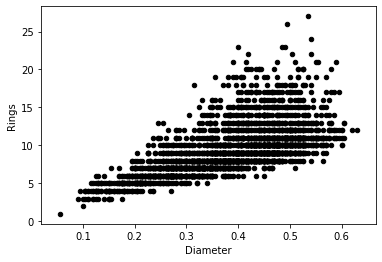

In [470]:
df.plot(kind='scatter', x='Diameter', y='Height', color='k')
df.plot(kind='scatter', x='Diameter', y='Full Size', color='k')
df.plot(kind='scatter', x='Diameter', y='Viscera Weight', color='k')
df.plot(kind='scatter', x='Diameter', y='Shell Weight', color='k')
df.plot(kind='scatter', x='Diameter', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Diameter', y='Rings', color='k')

**Alto**

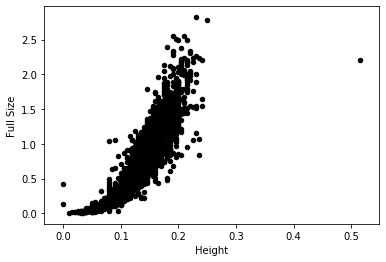

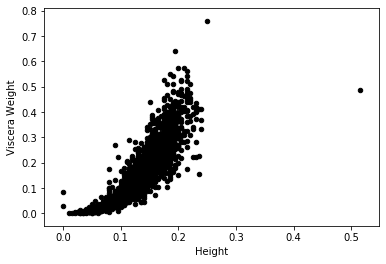

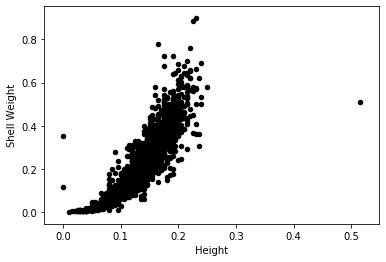

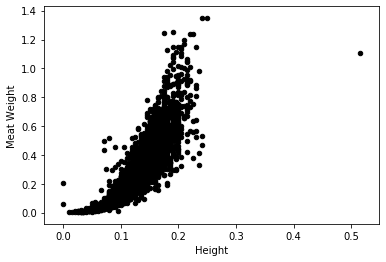

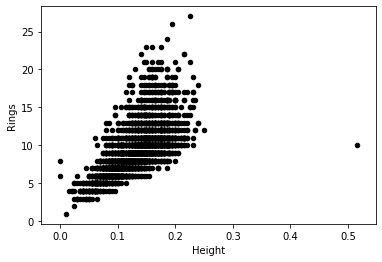

In [471]:
df.plot(kind='scatter', x='Height', y='Full Size', color='k')
df.plot(kind='scatter', x='Height', y='Viscera Weight', color='k')
df.plot(kind='scatter', x='Height', y='Shell Weight', color='k')
df.plot(kind='scatter', x='Height', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Height', y='Rings', color='k')

**Peso total**

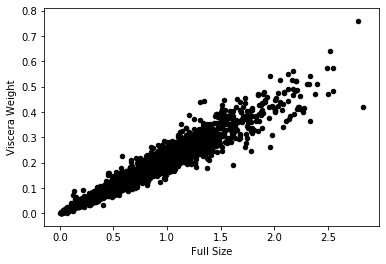

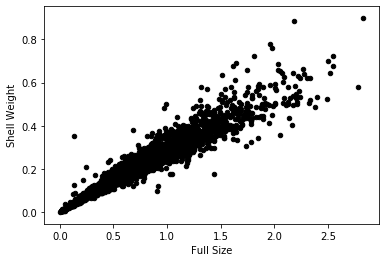

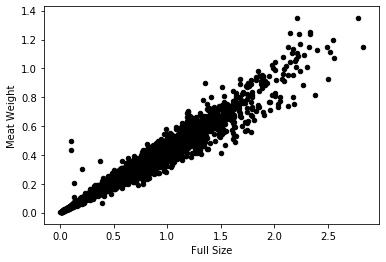

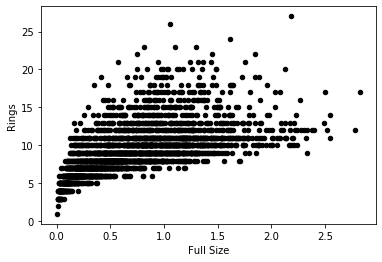

In [472]:
df.plot(kind='scatter', x='Full Size', y='Viscera Weight', color='k')
df.plot(kind='scatter', x='Full Size', y='Shell Weight', color='k')
df.plot(kind='scatter', x='Full Size', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Full Size', y='Rings', color='k')

**Peso de visceras**

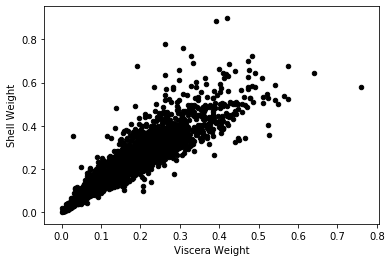

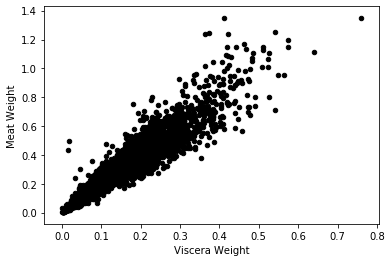

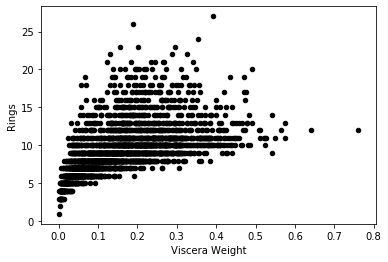

In [473]:
df.plot(kind='scatter', x='Viscera Weight', y='Shell Weight', color='k')
df.plot(kind='scatter', x='Viscera Weight', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Viscera Weight', y='Rings', color='k')

**Peso del caparazón**

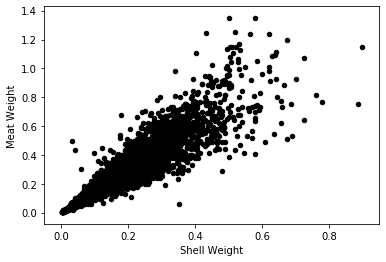

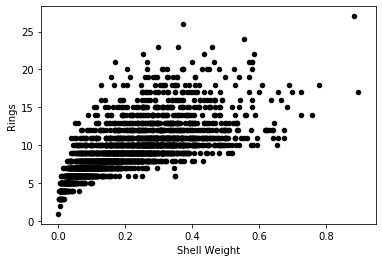

In [474]:
df.plot(kind='scatter', x='Shell Weight', y='Meat Weight', color='k')
df.plot(kind='scatter', x='Shell Weight', y='Rings', color='k')

**Peso de carne**

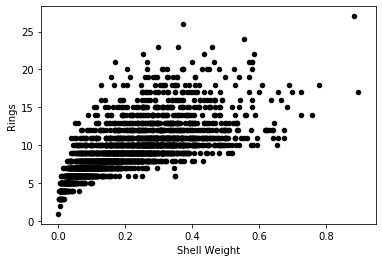

In [475]:
df.plot(kind='scatter', x='Shell Weight', y='Rings', color='k')

En primera instancia, se ve que los anillos no tienen colinealidad con ninguna de las otras variables.
En segundo lugar, todos los pesos entre presentan una relación bastante lineal con lo cual se elegirá uno de ellos y en cuanto a las dimensiones de alto, longitud y diámetro entre ellas tambíen se pueden explicar con una relación lineal. 

De esta manera, las variables elegidas para crear el modelo posiblemente sean el diametro, el peso total y los anillos. 

## Training & Testing Sets

Antes de ajustar el modelo, es necesario separar los datos en un _training set_ y un _testing set_.

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

y = df["Gender"].to_numpy()
X = df[["Diameter", "Meat Weight"]].to_numpy()

classes = ["I", "M"]
y = label_binarize(y, classes = classes).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Training set size: %d samples" % X_train.shape[0])
print("Testing set size: %d samples" % X_test.shape[0])

Training set size: 2009 samples
Testing set size: 861 samples


In [491]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()
classifier = classifier.fit(X_train, y_train)

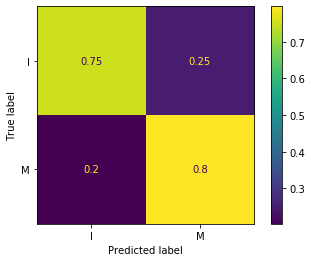

In [492]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

plot_confusion_matrix(classifier, X_test, y_test,
                      display_labels=classes,
                      normalize="true")
plt.show()

In [493]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print("Accuracy: %f" % accuracy_score(y_test, y_pred, normalize=True))
print("Precision: %f" % precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.774681
Precision: 0.774854
Recall: 0.774085


### Curva ROC

In [494]:
import numpy as np
from sklearn.metrics import roc_curve, auc
           
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

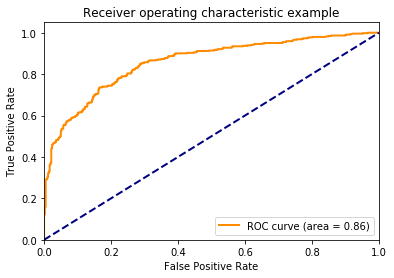

In [495]:
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         color = 'darkorange',
         lw = lw,
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Akaike Information Criterion (AIC)

Al cambiar el modelo con 2 variables independientes, el AIC dió mejor para `Diameter` y `Meat Weight`. 
Cuando se utilizó un modelo con 3 variables independientes, el AIC era mayor valor (menos negativo).

Por ende, la decisión es de tomar menos variables con el mejor AIC posible dado que la métricas de _Precision_, _Accuracy_ y _Recall_ son muy similares.

Vale aclarar que para el problema de clasificación binaria se utiliza `log_loss` a diferencia de un problema de regresión lineal que se utiliza `mse`.

In [496]:
from sklearn.metrics import log_loss

k = 3
loss = log_loss(y_test, y_pred)
aic = -2 * loss  + 2 * k

print("Loss: %f" % loglikelihood)
print("AIC: %f" % aic)

Loss: 7.782353
AIC: -9.564706
